<a href="https://colab.research.google.com/github/TatyanaLanceva/Netology/blob/main/3_3_Sales_volume_histograms_for_France_and_Germany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   Используйте датасет [data_hw_2_(upd).xlsx ](https://docs.google.com/spreadsheets/d/1LzWPjuvABo39nc_QyRPzHMVLNLs0s-GH?rtpof=true&usp=drive_fs).
*   Постройте гистограммы плотности распределения объёмов продаж для Франции и Германии и определите типы распределений.
*   С помощью стат. критериев сравните объёмы продаж во Франции и Германии:
*   Гипотеза: «Объёмы продаж Франции отличаются от объёмов продаж Германии».
*   Сделайте выводы по результатам проверки.

Примечание: базовые гипотезы всегда формулируются одинаково, нулевая гипотеза гласит, что выборки значимо не отличаются, альтернативная – наоборот; проверяемая гипотеза всегда является альтернативной.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Загружаем файл с данными и проверяем его

In [ ]:
df = pd.read_excel('data_hw_2__upd_.xlsx')
df.head()

,CustomerId,Gender,Age,Geography,"Balance, Euro","EstimatedSalary, Euro"
0,15815660,Female,37.374760,France,112542.729286,44585.817716
1,15815656,Female,50.122552,Germany,116610.117715,50417.699036
2,15815628,Female,13.436561,France,76470.519592,11413.463636
3,15815552,Female,31.963556,France,93863.675220,26318.453258
4,15815530,Female,29.909407,France,135003.312047,86017.408897


Формируем выборки по странам (Франция и Германия)

In [ ]:
df_1 = df[df['Country'] == 'France']
df_2 = df[df['Country'] == 'Germany']
print ('Выборки имеют одинаковую длину: ', len (df_1) == len (df_2))

Выборки имеют одинаковую длину:  True


# Проверяем распределение

Смотрим распределение через distplot

<ipython-input-34-d7525d25a941>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['TotalPrice'], 50)
<ipython-input-34-d7525d25a941>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2['TotalPrice'], 50)


<Axes: xlabel='TotalPrice', ylabel='Density'>

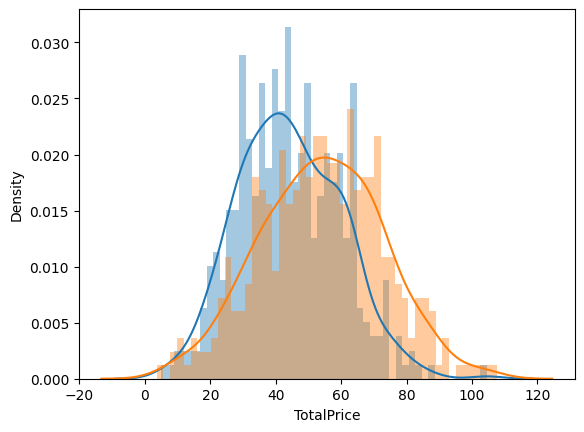

In [ ]:
sns.distplot(df_1['TotalPrice'], 50)
sns.distplot(df_2['TotalPrice'], 50)


Строим распределение через histplot

<Axes: xlabel='TotalPrice', ylabel='Count'>

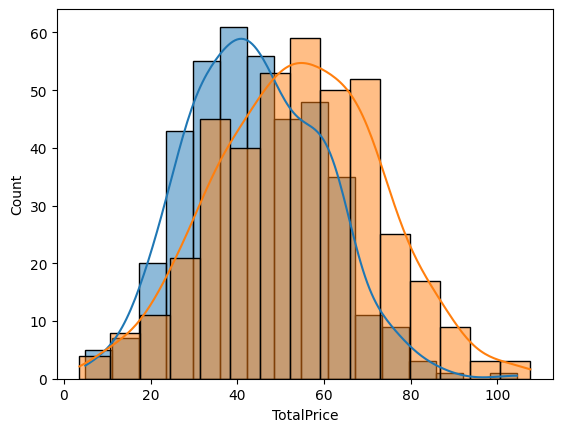

In [ ]:
sns.histplot(df_1['TotalPrice'], kde=True) #Франция

sns.histplot(df_2['TotalPrice'], kde=True) #Германия

Выведем график распределения продаж отдельно для Франции

<Axes: xlabel='TotalPrice', ylabel='Count'>

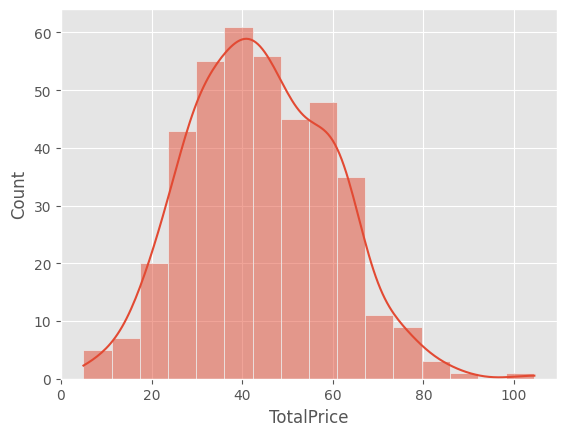

In [ ]:
sns.histplot(df_1['TotalPrice'], kde=True) #Франция

Выведем график распределения продаж отдельно для Германии

<Axes: xlabel='TotalPrice', ylabel='Count'>

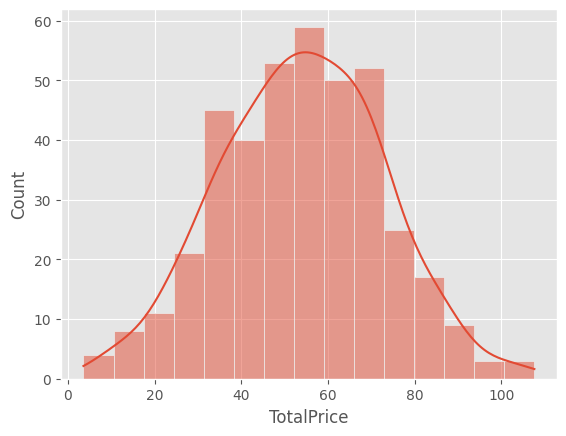

In [ ]:
sns.histplot(df_2['TotalPrice'], kde=True) #Германия

Выводы: при изучении графиков распределения продаж мы видим, что график Германии имеет нормальное распределение. График  Франции имеет некоторое отклонение от нормального распределения, но очень близок к нему.

# Проверка гипотезы
H0 = Объёмы продаж Франции и Германии не имеют существенных различий

Подключения библиотек статистических критериев и задание уровня значимости

In [ ]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

alpha = 0.05                          # Уровень значимости

Проведение Т-Теста (t-критерий Стьюдента)

In [ ]:
result = ttest_ind(df_1['TotalPrice'], df_2['TotalPrice'])
print('p-value: %.8f' % result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.00000000
Отвергаем нулевую гипотезу


Проведение теста Манна — Уитни (U-критерий Манна — Уитни)

In [ ]:
result = mannwhitneyu(df_1['TotalPrice'], df_2['TotalPrice'])
print('p-value: %.8f' % result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.00000000
Отвергаем нулевую гипотезу


Проверка Bootstrap

In [ ]:
from scipy.stats import norm
from tqdm.auto import tqdm

alpha = 0.05                          # Уровень значимости

In [ ]:
def get_bootstrap(
    data_column_1,                    # Числовые значения первой выборки
    data_column_2,                    # Числовые значения второй выборки
    boot_it = 1000,                   # Количество бутстрэп-подвыборок
    statistic = np.mean,              # Интересующая нас статистика
    bootstrap_conf_level = 1-alpha    # Уровень значимости
):

    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)):    # Извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len,
            replace = True            # Параметр возвращения
        ).values

        samples_2 = data_column_2.sample(
            boot_len,                 # Чтобы сохранить дисперсию, берем такой же размер выборки
            replace = True
        ).values

        boot_data.append(statistic(samples_1-samples_2))
    pd_boot_data = pd.DataFrame(boot_data)

    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])

    p_1 = norm.cdf(
        x = 0,
        loc = np.mean(boot_data),
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0,
        loc = -np.mean(boot_data),
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2

    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else:
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')

    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()

    print('p-value: %.8f' % p_value)

    return p_value

  0%|          | 0/1000 [00:00<?, ?it/s]

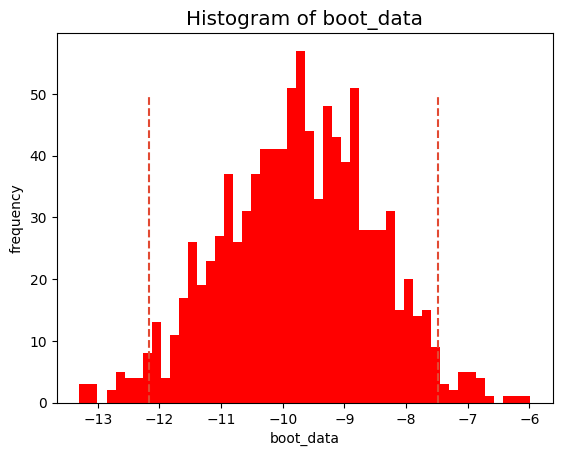

p-value: 0.00000000
Отвергаем нулевую гипотезу


In [ ]:
tmp_boot = get_bootstrap(
    df_1['TotalPrice'],                 # числовые значения первой выборки
    df_2['TotalPrice'],                 # числовые значения второй выборки
    boot_it = 1000,                 # количество бутстрэп-подвыборок
    statistic = np.mean,            # интересующая нас статистика
    bootstrap_conf_level = 1-alpha  # уровень значимости
)

if (tmp_boot < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Выводы: все способы проверки гипотезы, используемые в исследовании подтвердили, что H0 отвергается. Следовательно объемы продаж во Франции и Германии статистически различаются.